In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns

In [2]:
def retrieve_data():
    engine =  create_engine('sqlite:///../../data/database/happycows.db')
    with engine.connect() as con:
        score = pd.read_sql_table('classification', con)
        genetics = pd.read_sql_table('genetics', con)
    return score, genetics

def merge_data(score, genetics):
    return pd.merge(left=score, right=genetics, left_on='animal_id', right_on='animal_id')

def select_features(data):
    return data.drop(['age', 'name', 'date_calved', 'date'], axis=1).dropna(axis=0, how='any')

def get_data():
    score, genetics = retrieve_data()
    data = merge_data(score, genetics)
    return select_features(data)    

In [3]:
data = get_data()
codes = data['category'].astype('category').cat.codes.values
features = data.drop('category', axis = 1, inplace = False)

In [4]:
from sklearn import preprocessing
features_scaled = preprocessing.scale(features)

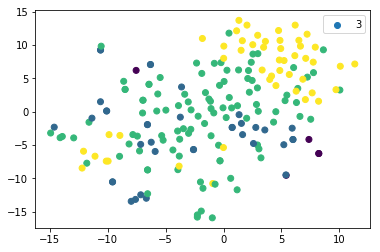

In [5]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(features_scaled)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by 
plt.scatter(xs, ys, c=codes)
plt.legend(codes)
plt.show()